# Open Avenues - Week 3

In [24]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
df = pd.read_csv("open_ave_data.csv")

# modifying the dataset and replacing any NaN values with a NAN keyword
df.fillna("NAN", inplace=True)

# reducing each column to its own corpus
findings = df["findings"].values.tolist()
clinical = df["clinicaldata"].values.tolist()
exam = df["ExamName"].values.tolist()
impression = df["impression"].values.tolist()

# combine the categories
all_documents = findings + clinical + exam + impression
print(len(findings), len(clinical), len(exam), len(impression))

954 954 954 954


In [25]:
tfidf_documents = vectorizer.fit_transform(all_documents)

Here's a TF-IDF matrix for each category of the dataset

In [26]:

vectorizer1 = TfidfVectorizer()
find_tfidf = vectorizer1.fit_transform(findings)
find_tfidf.toarray()
find_tfidf.shape
# vectorizer1.get_feature_names_out()

(954, 628)

In [27]:
vectorizer2 = TfidfVectorizer()
clin_tfidf = vectorizer2.fit_transform(clinical)
clin_tfidf.toarray()
clin_tfidf.shape
# vectorizer2.get_feature_names_out()

(954, 283)

In [28]:
vectorizer3 = TfidfVectorizer()
exam_tfidf = vectorizer3.fit_transform(exam)
exam_tfidf.toarray()
exam_tfidf.shape
# vectorizer3.get_feature_names_out()

(954, 238)

In [29]:
vectorizer4 = TfidfVectorizer()
impr_tfidf = vectorizer4.fit_transform(impression)
impr_tfidf.toarray()
impr_tfidf.shape
# vectorizer4.get_feature_names_out()

(954, 513)

Here's a combined Matrix of all TF-IDF matrices from our dataset

In [35]:
print(documents_tfidf.shape)
tfidf_documents.toarray()

(3816, 1084)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Now, I'm going to plot the TF-IDF matrix onto the same scatter plot. This way,  we can have a visual example of how similar or different each of the documents are in each category.

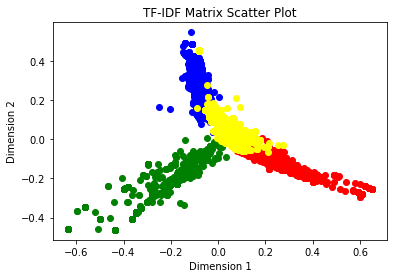

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# all_tfidf = [find_tfidf, clin_tfidf, exam_tfidf, impr_tfidf]

colors = ['red', 'green', 'blue','yellow']
labels = ['Findings', 'Clinical Data', 'Exam Name', 'Impressions']

pca = PCA(n_components=2)
tfidf_matrix_2d = pca.fit_transform(tfidf_documents.toarray())
# print(tfidf_matrix_2d.shape)
color = -1
label = -1
for i, document in enumerate(tfidf_matrix_2d):
    if i % 954 == 0:
        color+=1
        label+=1
    x_coords = document[0]
    y_coords = document[1]
    plt.scatter(x_coords, y_coords, color=colors[color], label=labels[label])

# Set plot title and axis labels.
plt.title("TF-IDF Matrix Scatter Plot")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

# Display the scatter plot.
plt.show()

In [32]:
print(tfidf_documents.shape)
print(tfidf_matrix_2d)

(3816, 1084)
[[ 0.60987198 -0.28141284]
 [ 0.49138739 -0.21642179]
 [ 0.60987198 -0.28141284]
 ...
 [-0.08106935  0.45872004]
 [ 0.00920798  0.02914884]
 [ 0.04617563 -0.0114492 ]]
